In [10]:
import zipfile
import os

with zipfile.ZipFile("Blinkit sales.zip", 'r') as zip_ref:
    zip_ref.extractall('blinkit_sales')

In [12]:
import pandas as pd

In [16]:
print(os.getcwd())

/home/c81fdd44-aad7-4aa0-a3c4-156f0807d915


In [20]:
df_orders = pd.read_csv("blinkit_sales/blinkit_orders.csv")

In [22]:
df_order_items = pd.read_csv("blinkit_sales/blinkit_order_items.csv")

In [28]:
df_orders.head()


,order_id,customer_id,order_date,promised_delivery_time,actual_delivery_time,delivery_status,order_total,payment_method,delivery_partner_id,store_id
0,1961864118,30065862,2024-07-17 08:34:01,2024-07-17 08:52:01,2024-07-17 08:47:01,On Time,3197.07,Cash,63230,4771
1,1549769649,9573071,2024-05-28 13:14:29,2024-05-28 13:25:29,2024-05-28 13:27:29,On Time,976.55,Cash,14983,7534
2,9185164487,45477575,2024-09-23 13:07:12,2024-09-23 13:25:12,2024-09-23 13:29:12,On Time,839.05,UPI,39859,9886
3,9644738826,88067569,2023-11-24 16:16:56,2023-11-24 16:34:56,2023-11-24 16:33:56,On Time,440.23,Card,61497,7917
4,5427684290,83298567,2023-11-20 05:00:39,2023-11-20 05:17:39,2023-11-20 05:18:39,On Time,2526.68,Cash,84315,2741


In [30]:
df_order_items.head()

,order_id,product_id,quantity,unit_price
0,1961864118,642612,3,517.03
1,1549769649,378676,1,881.42
2,9185164487,741341,2,923.84
3,9644738826,561860,1,874.78
4,5427684290,602241,2,976.55


In [32]:
df_order_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   order_id    5000 non-null   int64  
 1   product_id  5000 non-null   int64  
 2   quantity    5000 non-null   int64  
 3   unit_price  5000 non-null   float64
dtypes: float64(1), int64(3)
memory usage: 156.4 KB


In [34]:
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   order_id                5000 non-null   int64  
 1   customer_id             5000 non-null   int64  
 2   order_date              5000 non-null   object 
 3   promised_delivery_time  5000 non-null   object 
 4   actual_delivery_time    5000 non-null   object 
 5   delivery_status         5000 non-null   object 
 6   order_total             5000 non-null   float64
 7   payment_method          5000 non-null   object 
 8   delivery_partner_id     5000 non-null   int64  
 9   store_id                5000 non-null   int64  
dtypes: float64(1), int64(4), object(5)
memory usage: 390.8+ KB


In [36]:
df_orders['order_date'] = pd.to_datetime(df_orders['order_date'])
df_orders['promised_delivery_time'] = pd.to_datetime(df_orders['promised_delivery_time'])
df_orders['actual_delivery_time'] = pd.to_datetime(df_orders['actual_delivery_time'])

In [38]:
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   order_id                5000 non-null   int64         
 1   customer_id             5000 non-null   int64         
 2   order_date              5000 non-null   datetime64[ns]
 3   promised_delivery_time  5000 non-null   datetime64[ns]
 4   actual_delivery_time    5000 non-null   datetime64[ns]
 5   delivery_status         5000 non-null   object        
 6   order_total             5000 non-null   float64       
 7   payment_method          5000 non-null   object        
 8   delivery_partner_id     5000 non-null   int64         
 9   store_id                5000 non-null   int64         
dtypes: datetime64[ns](3), float64(1), int64(4), object(2)
memory usage: 390.8+ KB


In [46]:
df_merged = df_order_items.merge(df_orders, on = 'order_id', how ='left')
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   order_id                5000 non-null   int64         
 1   product_id              5000 non-null   int64         
 2   quantity                5000 non-null   int64         
 3   unit_price              5000 non-null   float64       
 4   customer_id             5000 non-null   int64         
 5   order_date              5000 non-null   datetime64[ns]
 6   promised_delivery_time  5000 non-null   datetime64[ns]
 7   actual_delivery_time    5000 non-null   datetime64[ns]
 8   delivery_status         5000 non-null   object        
 9   order_total             5000 non-null   float64       
 10  payment_method          5000 non-null   object        
 11  delivery_partner_id     5000 non-null   int64         
 12  store_id                5000 non-null   int64   

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns 

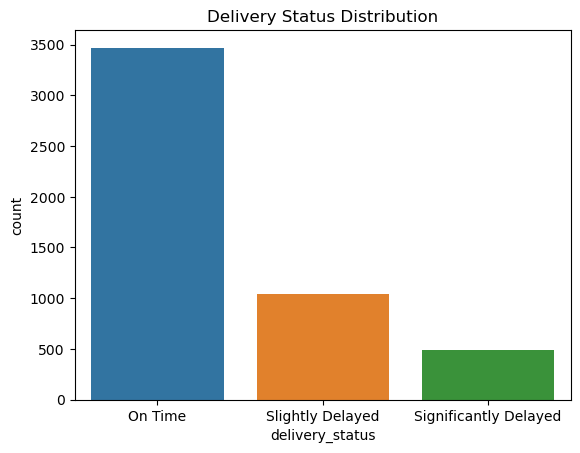

In [54]:
sns.countplot(data = df_orders, x = 'delivery_status')
plt.title('Delivery Status Distribution')
plt.show()

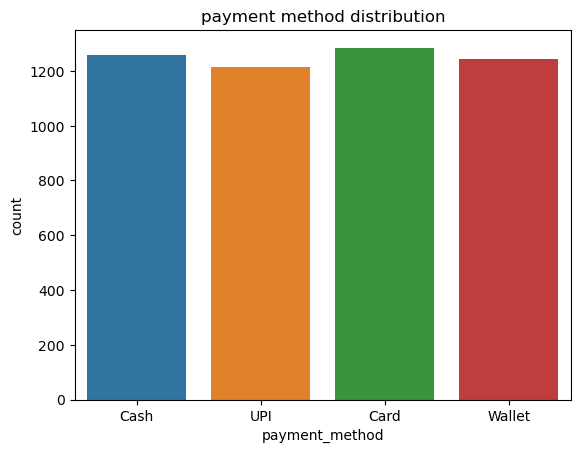

In [56]:
sns.countplot(data = df_orders, x = 'payment_method')
plt.title('payment method distribution')
plt.show()

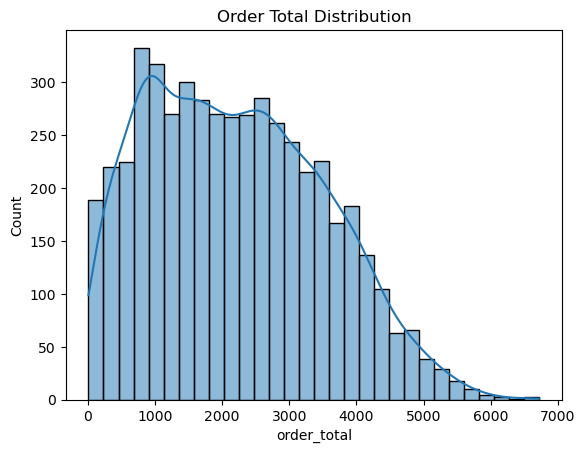

In [58]:
sns.histplot(df_orders['order_total'], bins=30, kde=True)
plt.title('Order Total Distribution')
plt.show()

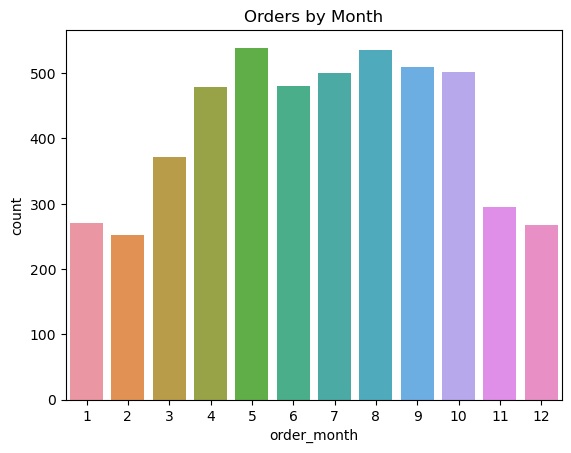

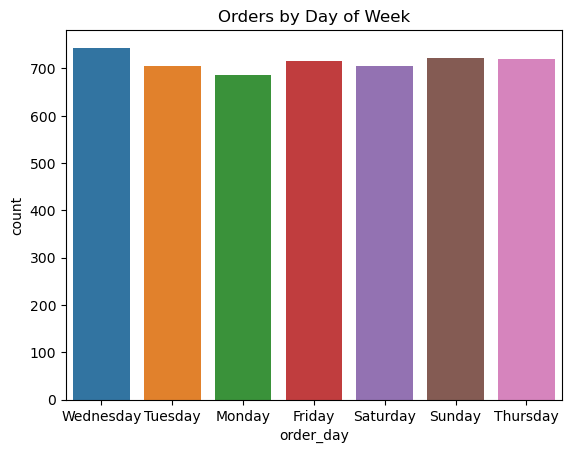

In [60]:
df_orders['order_month'] = df_orders['order_date'].dt.month
df_orders['order_day'] = df_orders['order_date'].dt.day_name()

sns.countplot(data=df_orders, x='order_month')
plt.title('Orders by Month')
plt.show()

sns.countplot(data=df_orders, x='order_day')
plt.title('Orders by Day of Week')
plt.show()

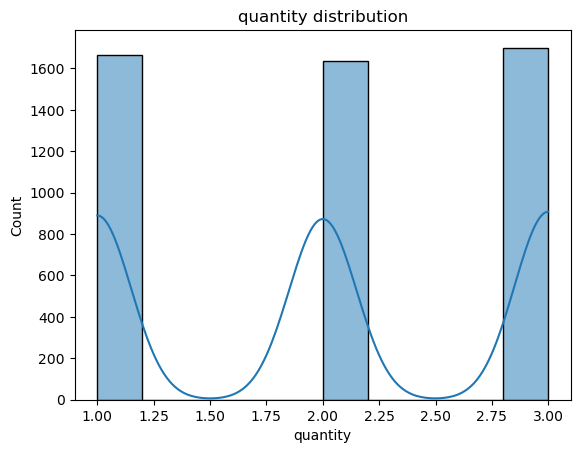

In [66]:
sns.histplot(df_order_items['quantity'], bins= 10, kde = True)
plt.title('quantity distribution')
plt.show()

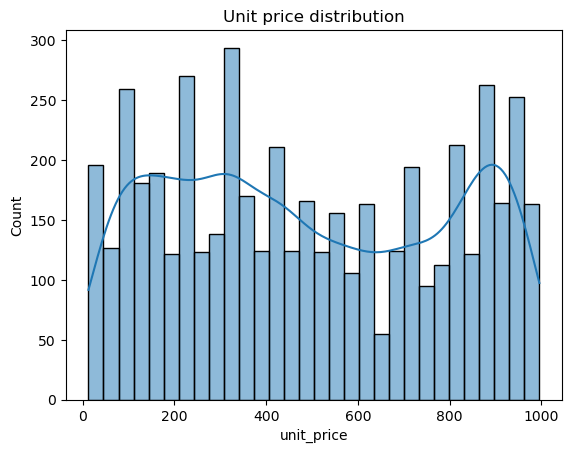

In [12]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
df_order_items = pd.read_csv("blinkit_sales/blinkit_order_items.csv")
sns.histplot(df_order_items['unit_price'], bins = 30, kde = True)
plt.title("Unit price distribution")
plt.show()

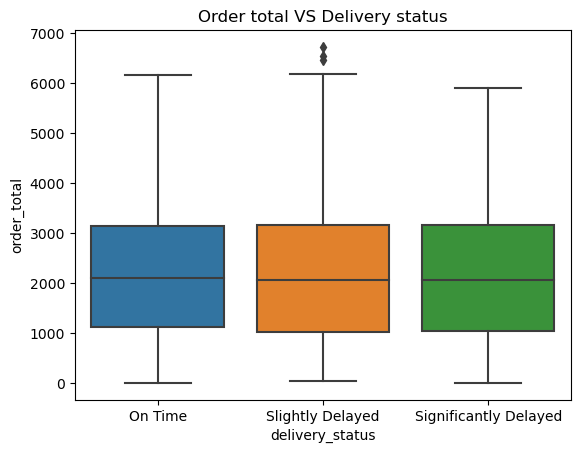

In [74]:
sns.boxplot(data = df_orders, x = "delivery_status", y = "order_total")
plt.title('Order total VS Delivery status')
plt.show()

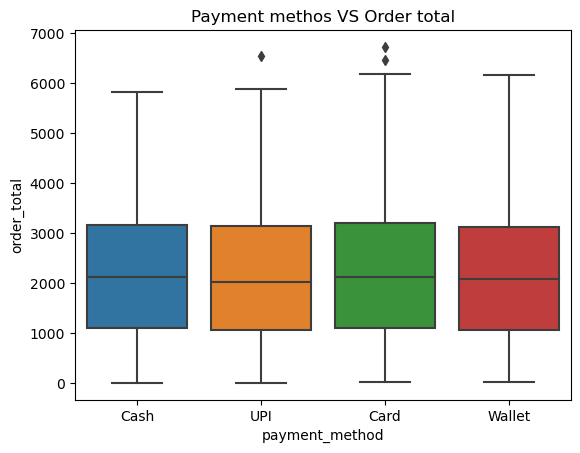

In [76]:
sns.boxplot(data = df_orders, x = 'payment_method', y = 'order_total')
plt.title('Payment methos VS Order total')
plt.show()

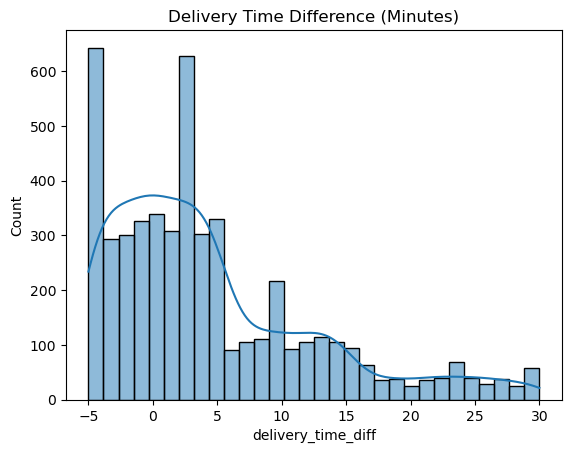

In [78]:
df_orders['delivery_time_diff'] = (df_orders['actual_delivery_time'] - df_orders['promised_delivery_time']).dt.total_seconds() / 60  # in minutes

sns.histplot(df_orders['delivery_time_diff'], bins=30, kde=True)
plt.title('Delivery Time Difference (Minutes)')
plt.show()

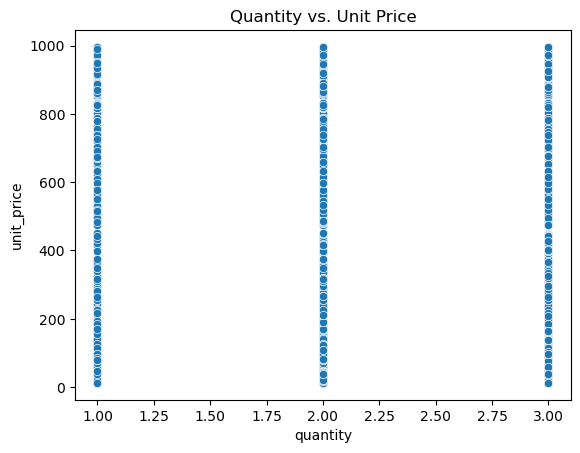

In [80]:
sns.scatterplot(data=df_order_items, x='quantity', y='unit_price')
plt.title('Quantity vs. Unit Price')
plt.show()

In [86]:
df_customer_feedback = pd.read_csv('blinkit_sales/blinkit_customer_feedback.csv')


In [88]:
df_customer_feedback.head()

,feedback_id,order_id,customer_id,rating,feedback_text,feedback_category,sentiment,feedback_date
0,2234710,1961864118,30065862,4,"It was okay, nothing special.",Delivery,Neutral,2024-07-17
1,5450964,1549769649,9573071,3,The order was incorrect.,App Experience,Negative,2024-05-28
2,482108,9185164487,45477575,3,"It was okay, nothing special.",App Experience,Neutral,2024-09-23
3,4823104,9644738826,88067569,4,The product met my expectations.,App Experience,Neutral,2023-11-24
4,3537464,5427684290,83298567,3,Product was damaged during delivery.,Delivery,Negative,2023-11-20


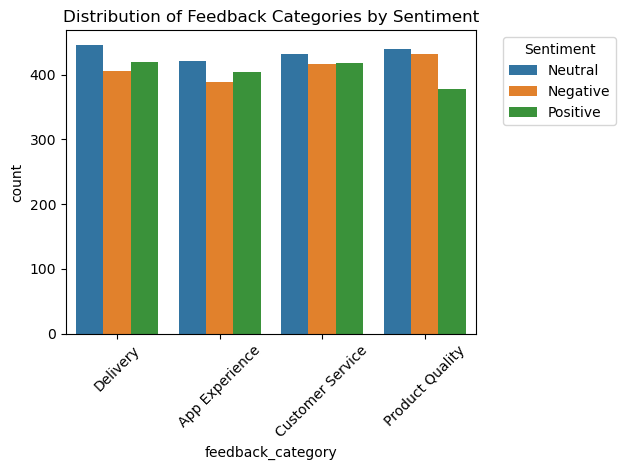

In [115]:
# Import required libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Create the countplot without legend parameter
sns.countplot(data=df_customer_feedback, x='feedback_category', hue='sentiment')

plt.title('Distribution of Feedback Categories by Sentiment')
plt.xticks(rotation=45)  # Rotate x-labels if they're too long
# Place legend outside to the right
plt.legend(title='Sentiment', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()  # Adjust layout to prevent label cutoff
plt.show()

In [119]:
df_customer_feedback.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   feedback_id        5000 non-null   int64 
 1   order_id           5000 non-null   int64 
 2   customer_id        5000 non-null   int64 
 3   rating             5000 non-null   int64 
 4   feedback_text      5000 non-null   object
 5   feedback_category  5000 non-null   object
 6   sentiment          5000 non-null   object
 7   feedback_date      5000 non-null   object
dtypes: int64(4), object(4)
memory usage: 312.6+ KB


In [14]:
df_mkt_perf = pd.read_csv("blinkit_sales/blinkit_marketing_performance.csv")

In [18]:
df_mkt_perf.head()


,campaign_id,campaign_name,date,target_audience,channel,impressions,clicks,conversions,spend,revenue_generated,roas
0,548299,New User Discount,2024-11-05,Premium,App,3130,163,78,1431.85,4777.75,3.60
1,390914,Weekend Special,2024-11-05,Inactive,App,3925,494,45,4506.34,6238.11,2.98
2,834385,Festival Offer,2024-11-05,Inactive,Email,7012,370,78,4524.23,2621.00,2.95
3,241523,Flash Sale,2024-11-05,Inactive,SMS,1115,579,86,3622.79,2955.00,2.84
4,595111,Membership Drive,2024-11-05,New Users,Email,7172,795,54,2888.99,8951.81,2.22


In [20]:
df_mkt_perf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5400 entries, 0 to 5399
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   campaign_id        5400 non-null   int64  
 1   campaign_name      5400 non-null   object 
 2   date               5400 non-null   object 
 3   target_audience    5400 non-null   object 
 4   channel            5400 non-null   object 
 5   impressions        5400 non-null   int64  
 6   clicks             5400 non-null   int64  
 7   conversions        5400 non-null   int64  
 8   spend              5400 non-null   float64
 9   revenue_generated  5400 non-null   float64
 10  roas               5400 non-null   float64
dtypes: float64(3), int64(4), object(4)
memory usage: 464.2+ KB


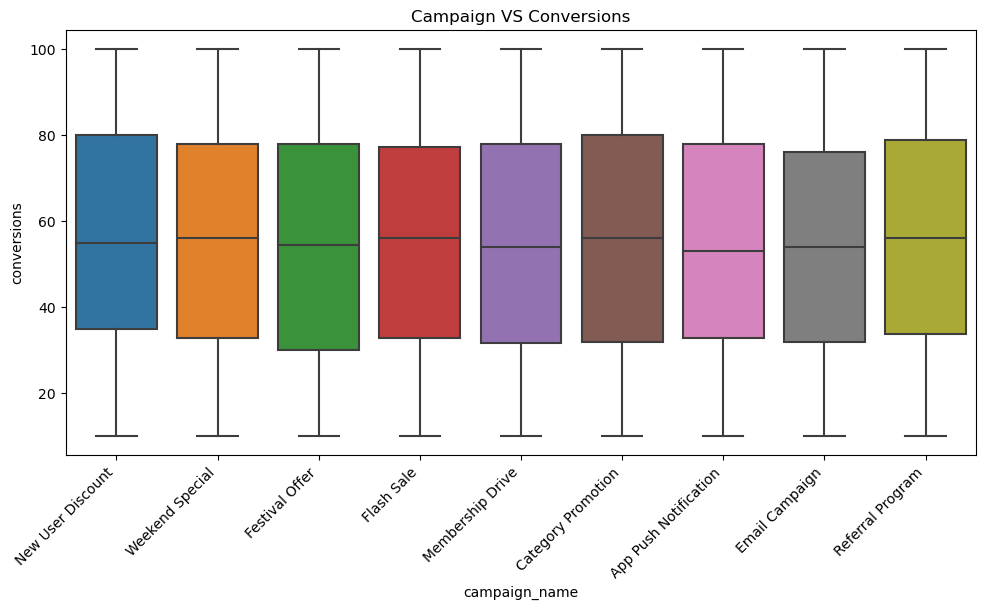

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 6))  # Make plot wider
sns.boxplot(data=df_mkt_perf, x="campaign_name", y="conversions")
plt.xticks(rotation=45, ha='right')  # Rotate labels 45 degrees
plt.tight_layout()  # Adjust layout to prevent label cutoff
plt.title('Campaign VS Conversions')
plt.show()


In [67]:
df_delivery_perf = pd.read_csv("blinkit_sales/blinkit_delivery_performance.csv")

In [69]:
df_delivery_perf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               5000 non-null   int64  
 1   delivery_partner_id    5000 non-null   int64  
 2   promised_time          5000 non-null   object 
 3   actual_time            5000 non-null   object 
 4   delivery_time_minutes  5000 non-null   float64
 5   distance_km            5000 non-null   float64
 6   delivery_status        5000 non-null   object 
 7   reasons_if_delayed     3098 non-null   object 
dtypes: float64(2), int64(2), object(4)
memory usage: 312.6+ KB
